In [0]:
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
labels = ['Tshirt','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
         'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
import matplotlib.pyplot as plt

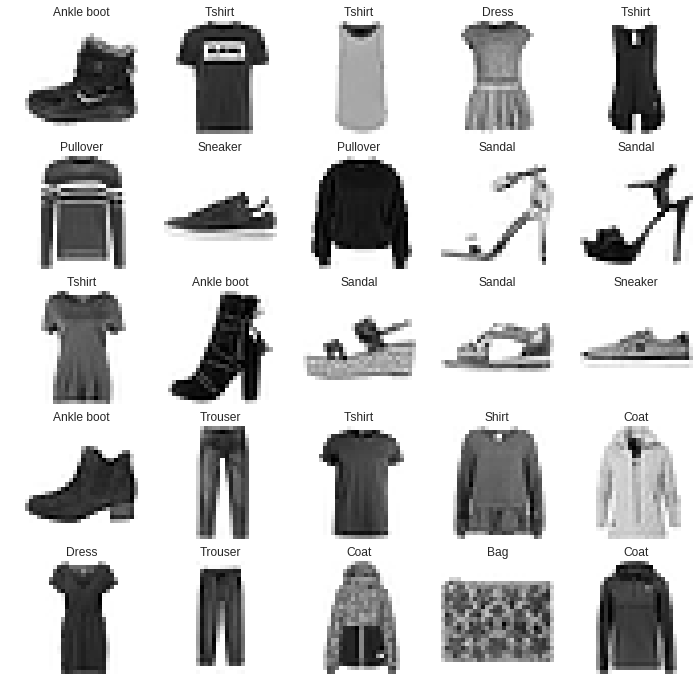

In [5]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  img = -1*train_images[i]
  plt.imshow(img,cmap='gray')
  plt.grid(None)
  plt.axis('off')
  plt.gca().set_title(labels[train_labels[i]])

In [6]:
train_images[0].shape, train_images[0].min(), train_images[0].max()

((28, 28), 0, 255)

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

In [0]:
import tensorflow as tf

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.5031 - acc: 0.8226
Epoch 2/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3794 - acc: 0.8621
Epoch 3/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3403 - acc: 0.8759
Epoch 4/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3165 - acc: 0.8841
Epoch 5/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2982 - acc: 0.8893


In [13]:
predictions = model.predict(test_images)
predictions.shape

(10000, 10)

In [0]:
import numpy as np

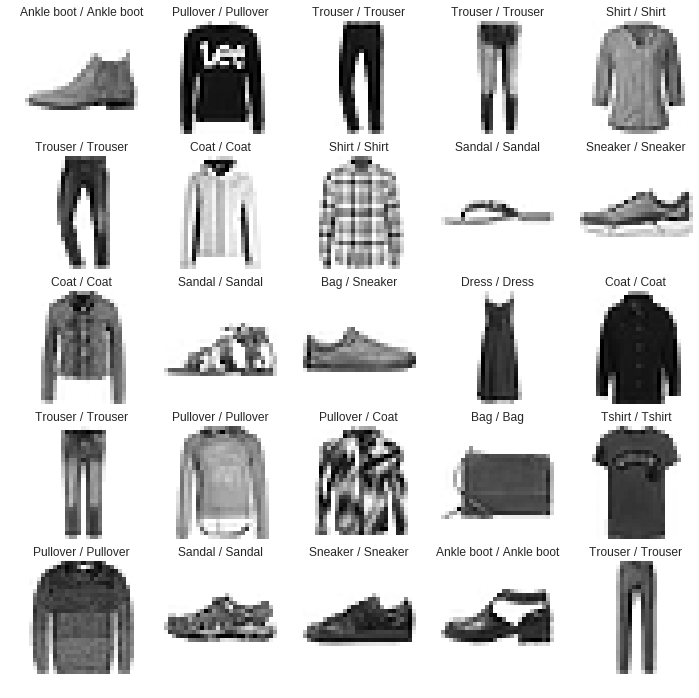

In [15]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  img = -1*test_images[i]
  plt.imshow(img,cmap='gray')
  plt.grid(None)
  plt.axis('off')
  pred_label = np.argmax(predictions[i])
  plt.gca().set_title(labels[pred_label] + ' / ' +labels[test_labels[i]])

In [0]:
from skimage import io, transform

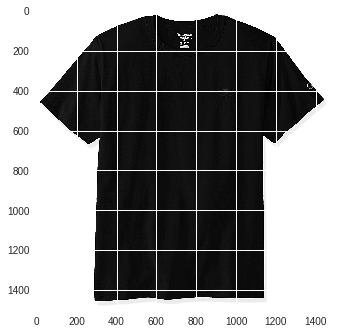

In [23]:
path = 'http://sonomanativesons.com/wp-content/uploads/2018/04/T-Shirt.jpg'
my_img = io.imread(path, flatten=True)
plt.imshow(-my_img)

In [18]:
small_img = transform.resize(my_img,(28,28))
my_test = np.zeros((1,28,28))
my_test[0,:,:] = 1-small_img

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [20]:
my_pred = model.predict(my_test)
print(labels[np.argmax(my_pred[0])])

Tshirt


In [24]:
for i,p in enumerate(my_pred[0]):
  print(labels[i],'\t',p*100)

Tshirt 	 64.64106440544128
Trouser 	 3.605800813488713e-06
Pullover 	 0.03536799049470574
Dress 	 8.689342507750553e-05
Coat 	 1.7700900301065303e-06
Sandal 	 5.579545506173567e-10
Shirt 	 35.32317876815796
Sneaker 	 6.169617588594138e-16
Bag 	 0.00028902334179292666
Ankle boot 	 1.393688224722578e-10
